<a href="https://colab.research.google.com/github/albertos-2002/SF3/blob/main/elettronica/esperienza_9/Esperienza_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#Stima dei parametri caratteristici del diodo

## ⚪ Dati

resistenza da 1Moh = 0.9925 megaohm scala 10megaohm

In [ ]:
#resistenza
resistenza = 0.9925 *1000000 #Mohm
err_resistenza = math.sqrt(1/3)* math.sqrt( (resistenza*1/100)**2 + (0.08)**2 )
print("Resistenza utilizzata")
print(resistenza/1000000, " \pm ", err_resistenza/1000000, "  Mohm")
print("errore relativo \n", 100*err_resistenza/resistenza)

Resistenza utilizzata
0.9925  \pm  0.0057302014218931835   Mohm
errore relativo 
 0.5773502692083812


In [ ]:
tensione_diodo = [0.267, 0.3173, 0.338, 0.3536, 0.3646, 0.374, 0.382, 0.3882, 0.3943, 0.3992 ] #V
tensione_in = [1,2,3,4,5,6,7,8,9,10] #V

## 🟠 Analisi

Nelle schede ci viene chiesto di eseguire una analisi di tipo lineare e ricavare da esse i parametri di $I_s$ e $n$

- Calcoliamo gli errori sulla tensione fornuta dal metrix

si è (in teoria) utilizzata la scala da 10V

In [19]:
#@title calcoli tensione
err_tensione_diodo = []
for i in tensione_diodo:
  dummy = 0
  dummy = math.sqrt(1/3)* math.sqrt( (i*0.03/100)**2 + (0.0008)**2 )
  err_tensione_diodo.append(dummy)
print("errore tensione diodo V")
print(err_tensione_diodo)

errore tensione diodo V
[0.0004641896200189458, 0.0004651383794456584, 0.0004655756150544542, 0.0004659230860703656, 0.000466177356950478, 0.00046640070039970276, 0.0004665951707136855, 0.00046674865884470764, 0.0004669020325864231, 0.00046702692913078717]


- Calcoliamo la corrente in ingresso al diodo

Il tutto è una serie, la corrente (in teoria) si conserva e per la legge di Ohm abbiamo che

$ V = R*I $

(assumiamo che la tensione in ingresso sia priva di errore)

In [57]:
#@title calcoli di corrente
corrente_diodo = []
for i in tensione_in:
  dummy = 0
  dummy = i/resistenza
  corrente_diodo.append(dummy)
print("Corrente nel diodo")
print(corrente_diodo)

corrente_diodo_micro = []
for i in corrente_diodo:
  dummy = 0
  dummy = i*1000000
  corrente_diodo_micro.append(dummy)
print("\ncorrente in micro ampere")
print( corrente_diodo_micro  )

Corrente nel diodo
[1.0075566750629722e-06, 2.0151133501259444e-06, 3.022670025188917e-06, 4.030226700251889e-06, 5.0377833753148614e-06, 6.045340050377834e-06, 7.052896725440806e-06, 8.060453400503778e-06, 9.068010075566751e-06, 1.0075566750629723e-05]

corrente in micro ampere
[1.0075566750629723, 2.0151133501259446, 3.022670025188917, 4.030226700251889, 5.037783375314861, 6.045340050377834, 7.052896725440806, 8.060453400503778, 9.06801007556675, 10.075566750629722]


In [58]:
#@title calcolo errore corrente
err_corrente_diodo = []
for i in corrente_diodo:
  dummy = 0
  dummy = i*err_resistenza/resistenza
  err_corrente_diodo.append(dummy)
print("errore corrente")
print(err_corrente_diodo)

err_corrente_diodo_micro = []
for i in err_corrente_diodo:
  dummy = 0
  dummy = i*1000000
  err_corrente_diodo_micro.append(dummy)
print("\nerr corrente in micro ampere")
print( err_corrente_diodo_micro  )

#propagazione dell errore al logaritmo
err_corrente_logaritmo_micro = []
for i in range(len(corrente_diodo_micro)):
  dummy = 0
  dummy = err_corrente_diodo_micro[i]/corrente_diodo_micro[i]
  err_corrente_logaritmo_micro.append(dummy)
print("\n errore corrente diodo log micro")
print(err_corrente_logaritmo_micro)

errore corrente
[5.817131175903085e-09, 1.163426235180617e-08, 1.7451393527709257e-08, 2.326852470361234e-08, 2.9085655879515426e-08, 3.4902787055418513e-08, 4.071991823132159e-08, 4.653704940722468e-08, 5.235418058312777e-08, 5.817131175903085e-08]

err corrente in micro ampere
[0.005817131175903085, 0.01163426235180617, 0.017451393527709257, 0.02326852470361234, 0.029085655879515424, 0.034902787055418515, 0.040719918231321595, 0.04653704940722468, 0.05235418058312777, 0.05817131175903085]

 errore corrente diodo log micro
[0.005773502692083812, 0.005773502692083812, 0.005773502692083813, 0.005773502692083812, 0.005773502692083812, 0.005773502692083813, 0.005773502692083812, 0.005773502692083812, 0.005773502692083813, 0.005773502692083812]


###Fit con tutti i punti

In [33]:
regrlin_pear_errpost_xys(tensione_diodo, np.log(corrente_diodo_micro), err_corrente_logaritmo_micro)

pendenza $b$	 17.801199538190474
$\sigma_b$	 0.04689218061555751
intercetta $a$	 -4.851655695026949
$\sigma_a$	 0.016877998527442456
Coefficiente di Pearson $\rho_{xy}$	 0.9966641628786777
$\sigma_{\rho_{xy}}$	 0.028854259723099556
Errore a posteriori $\delta$	 0.06345258301373462


Grafichimo i risultati

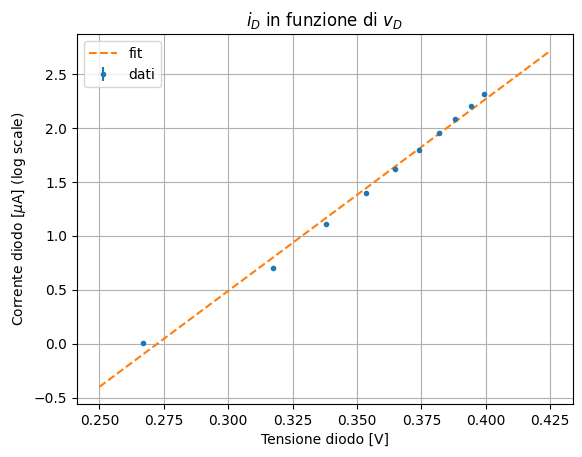

In [59]:
plt.errorbar( tensione_diodo, np.log(corrente_diodo_micro), yerr=err_corrente_logaritmo_micro, marker=".", linestyle="", label="dati" )
plt.plot( np.linspace(0.25,0.425,30), retta_fit_xba( np.linspace(0.25,0.425,30) , 17.801199538190474 , -4.851655695026949 ), marker="", linestyle="--", label="fit" )
plt.title("$i_D$ in funzione di $v_D$")
plt.xlabel("Tensione diodo [V]")
plt.ylabel("Corrente diodo [$\mu$A] (log scale)")
plt.grid()
plt.legend()

chi quadro 
 966.295269804791
NDOF  
 8


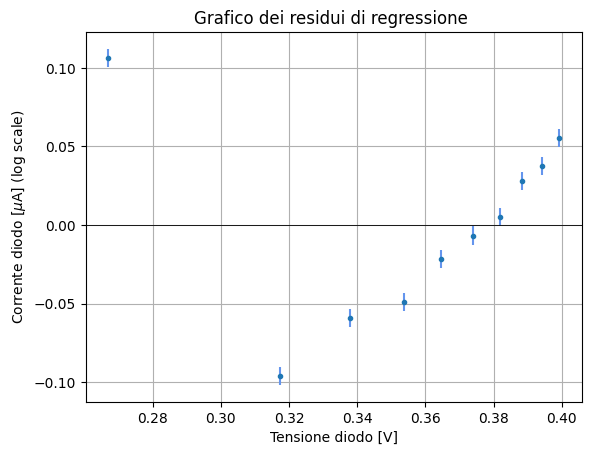

In [60]:
chi_quadro_lineare( np.log(corrente_diodo_micro), tensione_diodo , err_corrente_logaritmo_micro, -4.851655695026949, 17.801199538190474, "Corrente diodo [$\mu$A] (log scale)", "Tensione diodo [V]", "")

Possiamo vedere che la regressione e i residui non sono compatibili con la nostra ipotesi

###Fit dei dati senza il primo punto

In [46]:
regrlin_pear_errpost_xys(tensione_diodo[1:], np.log(corrente_diodo_micro[1:]), err_corrente_logaritmo_micro[1:])

pendenza $b$	 19.590034403185427
$\sigma_b$	 0.07456972961900717
intercetta $a$	 -5.52159499388506
$\sigma_a$	 0.02750244878007732
Coefficiente di Pearson $\rho_{xy}$	 0.9998954312295167
$\sigma_{\rho_{xy}}$	 0.005465823769292772
Errore a posteriori $\delta$	 0.008291117003092846


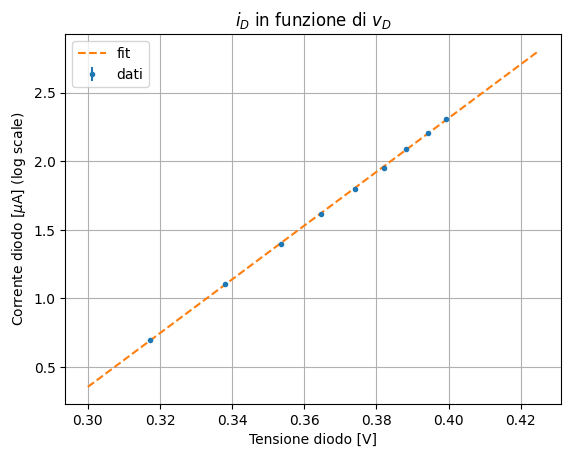

In [61]:
plt.errorbar( tensione_diodo[1:], np.log(corrente_diodo_micro[1:]), yerr=err_corrente_logaritmo_micro[1:], marker=".", linestyle="", label="dati" )
plt.plot( np.linspace(0.3,0.425,30), retta_fit_xba( np.linspace(0.3,0.425,30) , 19.590034403185427 , -5.52159499388506 ), marker="", linestyle="--", label="fit" )
plt.title("$i_D$ in funzione di $v_D$")
plt.xlabel("Tensione diodo [V]")
plt.ylabel("Corrente diodo [$\mu$A] (log scale)")
plt.grid()
plt.legend()

chi quadro 
 14.4359504424469
NDOF  
 7


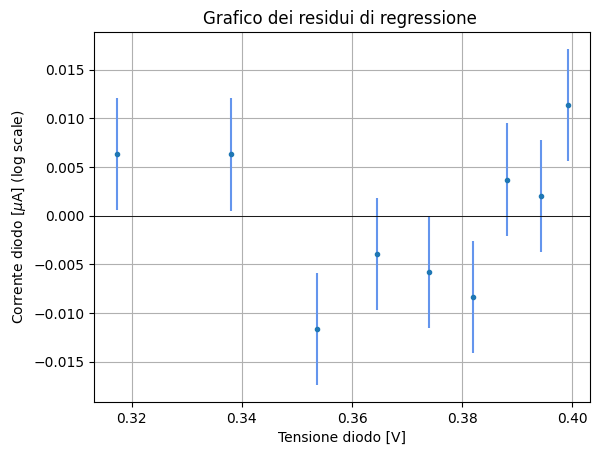

In [62]:
chi_quadro_lineare( np.log(corrente_diodo_micro[1:]), tensione_diodo[1:] , err_corrente_logaritmo_micro[1:], -5.52159499388506, 19.590034403185427, "Corrente diodo [$\mu$A] (log scale)", "Tensione diodo [V]", "")

Come possiamo vedere il fit è notevolmente migliorato, i residui hanno perso l'evidenza del trend anche se possiamo vedere ancora regioni nelle quili distinguiamo sovrastima e sottostima, e anche il chi quadro è diventato più ragionevole, (il valore di aspettazione non viene ancora rispettato ma ci si avvicina)

###Fit di tipo esponenziale

In [52]:
def funzione_esponenziale(x, i_s, n, v_t):
  return i_s*( math.e**( x / (n*v_t) ) )

param, matrixcov = curve_fit( funzione_esponenziale, tensione_diodo, corrente_diodo_micro, sigma=err_corrente_diodo_micro )

print("parametri di regressione i_s, n, v_t")
print(param)
print("matrice di covarianza")
print(matrixcov)

parametri di regressione i_s, n, v_t
[0.00738666 0.22998743 0.2422923 ]
matrice di covarianza
[[ 2.66421552e-06  2.36462219e+09 -2.49113501e+09]
 [ 2.36462219e+09  2.02169682e+25 -2.12986233e+25]
 [-2.49113501e+09 -2.12986233e+25  2.24381494e+25]]


i parametri che vengono restituiti non concidono con i concetti teorici per quanto riguarda i parametri dei diodi, n deve esere almeno uguale a 1

conseguentemente scartiamo questo metodo

inoltre gli errori riportati non sono esattamente sensati

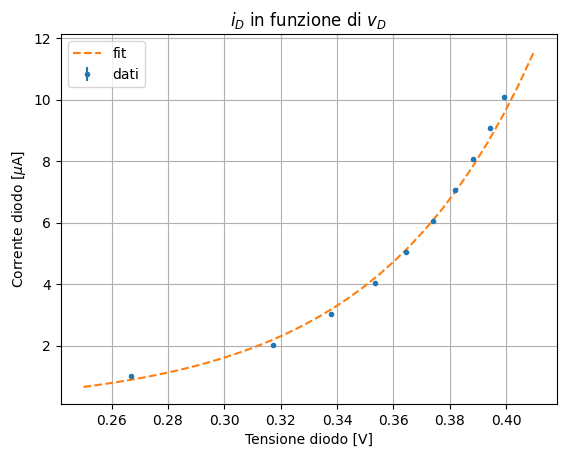

In [63]:
plt.errorbar( tensione_diodo, corrente_diodo_micro, yerr=err_corrente_diodo_micro, marker=".", linestyle="", label="dati" )
plt.plot( np.linspace(0.25,0.41,30), funzione_esponenziale(np.linspace(0.25,0.41,30), 0.00738666, 0.22998743, 0.2422923), marker="", linestyle="--", label="fit" )
plt.title("$i_D$ in funzione di $v_D$")
plt.xlabel("Tensione diodo [V]")
plt.ylabel("Corrente diodo [$\mu$A]")
plt.grid()
plt.legend()

### Calcolo dei parametri che caratterizzano il diodo

Dal valore dell'intercetta ricaviamo il valore sperimentale di $I_s$

In [65]:
i_s = math.e**(-5.52159499388506) #l'unita di misura sarà micro ampere
err_i_s = i_s*0.02750244878007732
print(i_s, " \pm ", err_i_s)

0.0039994637318599  \pm  0.0001099950464332538


Una corrente di saturazione di 4 nano ampere è leggermente altina

Calcoliamo il valore di $n* V_t$ dal coefficiente angolare della retta

In [66]:
n_vt = 1/19.590034403185427
err_n_vt = n_vt*0.07456972961900717/19.590034403185427
print(n_vt, " \pm ", err_n_vt)

0.0510463626259582  \pm  0.00019430866637133314


Se assumiamo che (riportato nelle slide di teoria) che la tensione termica sia pari a circa 26$mV$ nelle nostre condizioni sperimentali (circa 300$K$)

In [68]:
fattore_idealita = n_vt / 0.026
print(fattore_idealita)

1.9633216394599309


che rientra (per poco) nei limiti teorici presentati a lezione

#Librerie

In [28]:
def regrlin_pear_errpost_xys(input_x, input_y, input_sigma) :
  import math
  import sys
  #dati input
  x = list(input_x)
  y = list(input_y)
  sigma = list(input_sigma)
  dimensione = len(x)
  if len(x) != len(y):
    print("X E Y DIMENSIONE DIVERSA")
    sys.exit()
  if len(x) != len(sigma):
    print("X E SIGMA DIMENSIONE DIVERSA")
    sys.exit()
  #REGRESSIOBNE LINEARE
  #calcolo del delta
  parametro_1 = 0
  parametro_2 = 0
  parametro_3 = 0
  for i in range(dimensione): #primo termine del delta
    dummy_1 = 0
    dummy_1 = 1/ pow(sigma[i],2)
    parametro_1 = dummy_1 + parametro_1
  for i in range(dimensione): #secondo termine del delta
    dummy_2 = 0
    dummy_2 = pow(x[i],2) / pow(sigma[i],2)
    parametro_2 = dummy_2 + parametro_2
  dummy_3_1 = 0
  for i in range(dimensione): #terzo termine del delta
    dummy_3 = 0
    dummy_3 = x[i] / pow(sigma[i],2)
    dummy_3_1 = dummy_3 + dummy_3_1
  parametro_3 = pow(dummy_3_1,2)
  delta = (parametro_1*parametro_2) - parametro_3
  delta_1 = 1/delta
  #calcolo di b
  parametro_4 = 0
  parametro_5 = 0
  parametro_6 = 0
  parametro_7 = 0
  for i in range(dimensione): #calcolo del primo termine di a
    dummy_4 = 0
    dummy_4 = 1/pow(sigma[i],2)
    parametro_4 = dummy_4 + parametro_4
  for i in range(dimensione): #calcolo del secondo termine di a
    dummy_5 = 0
    dummy_5 = (x[i]*y[i]) / pow(sigma[i],2)
    parametro_5 = dummy_5 + parametro_5
  for i in range(dimensione): #calcolo del terzo termine di a
    dummy_6 = 0
    dummy_6 = x[i] / pow(sigma[i],2)
    parametro_6 = dummy_6 + parametro_6
  for i in range(dimensione): #calcolo del quarto termine di a
    dummy_7 = 0
    dummy_7 = y[i] / pow(sigma[i],2)
    parametro_7 = dummy_7 + parametro_7
  dummy_b1 = delta_1*parametro_4*parametro_5
  dummy_b2 = delta_1*parametro_6*parametro_7
  b = dummy_b1-dummy_b2
	#calcolo di a
  parametro_8 = parametro_2
  parametro_9 = parametro_7
  parametro_10 = parametro_6
  parametro_11 = parametro_5
  dummy_a1 = delta_1*parametro_8*parametro_9
  dummy_a2 = delta_1*parametro_10*parametro_11
  a = dummy_a1-dummy_a2
  #calcolo incertezza e covarianza
  #sigma b
  sigma_b = math.sqrt(delta_1*parametro_1)
  #sigma a
  sigma_a = math.sqrt(delta_1*parametro_8)
  #covrianza
  #al mmento non disponibile
  #COEFFICIENTE DI CORRELLAZIONE DI PEARSON
  media_x = sum(x) / dimensione
  media_y = sum(y) / dimensione
  numeratore = 0
  denominatore = 0
  dummy_denx = 0
  dummy_deny = 0
  for i in range(dimensione):
    dummy_x = x[i]-media_x
    dummy_y = y[i]-media_y
    dummy_numeratore = dummy_x*dummy_y
    numeratore = dummy_numeratore + numeratore
    dummy_x2 = pow(dummy_x,2)
    dummy_y2 = pow(dummy_y,2)
    dummy_denx = dummy_x2 + dummy_denx
    dummy_deny = dummy_y2 + dummy_deny
  dummy_denominatore = dummy_denx * dummy_deny
  denominatore = math.sqrt(dummy_denominatore)
  rxy = numeratore / denominatore
  numeratore_sigma = 1 - pow(rxy,2)
  denominatore_sigma = dimensione - 2
  sigma_rxy = math.sqrt(numeratore_sigma/denominatore_sigma)
  #ERRORE A POSTERIORI
  parametro_12 = 1 / (dimensione - 2)
  y_riferimento = []
  for i in range(dimensione):
    dummy_y = 0
    dummy_y = a + (b*x[i])
    y_riferimento.append(dummy_y)
  scarti_quadrati = 0
  for i in range(dimensione):
    dummy_sq = y[i] - y_riferimento[i]
    dummy_sq2 = pow(dummy_sq,2)
    scarti_quadrati = dummy_sq2 + scarti_quadrati
  errore_posteriori = math.sqrt(parametro_12*scarti_quadrati)
  #print dei risultati
  print("pendenza $b$\t", b)
  print("$\sigma_b$\t", sigma_b)
  print("intercetta $a$\t", a)
  print("$\sigma_a$\t", sigma_a)
  #print("covarianza", )
  print("Coefficiente di Pearson $\\rho_{xy}$\t",  rxy)
  print("$\sigma_{\\rho_{xy}}$\t", sigma_rxy)
  print("Errore a posteriori $\delta$\t",  errore_posteriori)

In [29]:
def retta_fit_xba(x, b,a):
  y = []
  for i in range(len(x)):
    dummy = 0
    dummy = (x[i]*b) + a
    y.append(dummy)
  return y

def retta_fit_xa(x, a):
  y = []
  for i in range(len(x)):
    dummy = 0
    dummy = (x[i]*0) + a
    y.append(dummy)
  return y

In [30]:
def chi_quadro_lineare(y_vec, x_vec, sigma_vec, inte, pend, stringa_ytitle, stringa_xtitle, stringa_titolo):

	import math
	import matplotlib.pyplot as plt

#La formula della retta utilizzata è: y = a + bx
#dati
	y = list(y_vec)
	x = list(x_vec)
	sigma = list(sigma_vec)
	intercetta = inte
	pendenza = pend
	dimensione = len(y)

#calcolo del riferimento
	y_ref = []
	for i in x:
		dummy_1 = 0
		dummy_1 = (i*pendenza) + intercetta
		y_ref.append(dummy_1)

#calcolo del chi quadro
	vettore_scarti_quadratici = []
	vettore_scarti = []
	for i in range(dimensione):
		dummy_2 = 0
		dummy_3 = 0
		dummy_4 = 0
		dummy_2 = y[i] - y_ref[i]
		dummy_3 = dummy_2 / sigma[i]
		dummy_4 = dummy_3**2
		vettore_scarti_quadratici.append(dummy_4)
		vettore_scarti.append(dummy_2)

	chi_quadro = sum(vettore_scarti_quadratici)
	print("chi quadro \n", chi_quadro)
	print("NDOF  \n", dimensione-2)

#print del grafico degli scarti
	ascisse = x

	plt.errorbar(ascisse, vettore_scarti, marker=".", linestyle="none", yerr=sigma, ecolor="cornflowerblue")
	plt.title("Grafico dei residui di regressione " + stringa_titolo )
	plt.ylabel(stringa_ytitle)
	plt.xlabel(stringa_xtitle)
	plt.axhline(0, color='black', linewidth="0.6")
	plt.grid()